<a href="https://colab.research.google.com/github/Ankush11-hash/simple-_project/blob/master/Healthcare_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict the Patients having Diabetes and provide how important each feature is for the decision**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/payutech/diabetes/master/diabetes.csv',)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


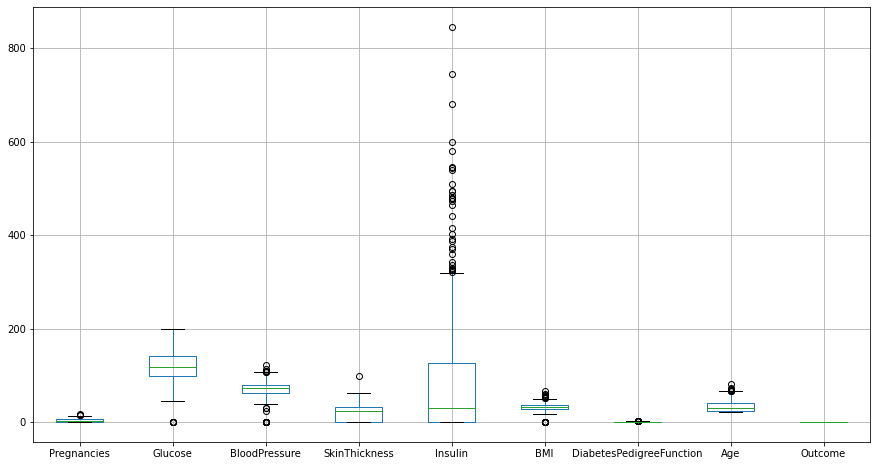

In [51]:
plt.figure(figsize=(15,8))
df.boxplot()
# there are too many outliers present in the data which needs to be handled

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6641f766a0>,
      dtype=object)

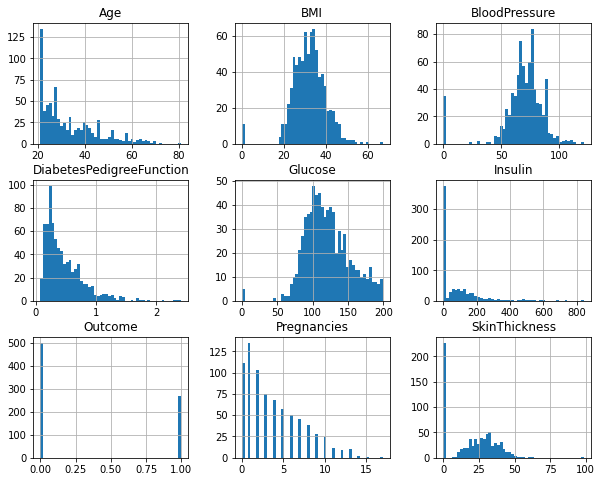

In [52]:

df.hist(bins=50,figsize=(10,8))

In [53]:
#df[df.Insulin == 0]
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

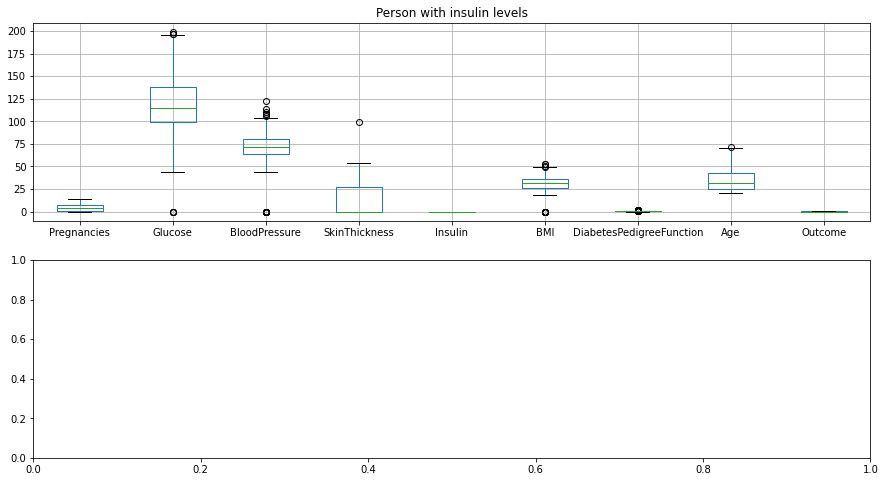

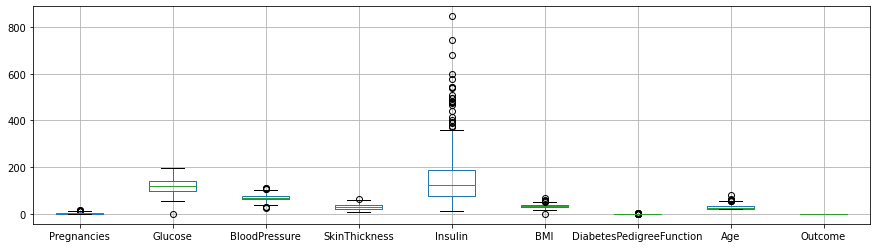

In [54]:
df_in=df[df.Insulin == 0]
plt.figure(figsize=(15,8))
plt.title('Person with zero insulin levels')
plt.subplot(211)
df_in.boxplot()
df_not_in=df[df.Insulin != 0]
plt.title('Person with insulin levels')
plt.subplot(212)
plt.figure(figsize=(15,4))
df_not_in.boxplot()

**What happens to a diabetic without insulin?**

With too little insulin, the body can no longer move glucose from the blood into the cells, causing high blood glucose levels. If the glucose level is high enough, excess glucose spills into the urine.This is because the body attempts to make new energy from fat and causes acids to be produced as waste products.



In [55]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Insights from above analysis to choose relevent features**

Insulin is not directly correalted with outcome as it can be seen from df.corr(),but insulin is having some  correlation  to Glucose levels and Skin thickness and Glucose levels are here related to Outcome column, There fore Insulin as feature for detection of the outcome. 



### **Dealing with outliers ,unwanted Zero values and missing values**

In [56]:
# There seems to be having many outliers in Insulin section.
#df['BloodPressure'].min() <========== This results in 0
df['BloodPressure'].loc[df.BloodPressure == 0].count()

35

Zero BloodPressure is not a case when perosn is alive.We could either drop the zero values or replace with the mean,median or mode.

500 people donot have Diabetes
268 people have Diabetes

**So, we will replace the missing data of bloodpressure of Diabetes patients with the  mean of bloodpressure of people having Diabetes and vica versa **

In [57]:
df_temp1  =df.loc[df.Outcome== 1] # having Diabetes
mean_hav = df_temp1['BloodPressure'].mean()
#******
df_temp2  =df.loc[df.Outcome== 0] # not having Diabetes
mean_not_hav = df_temp2['BloodPressure'].mean()

print('Blood pressure mean of having Diabetes = {}\nBlood pressure mean of having Diabetes = {}'.format(mean_hav,mean_not_hav))

df['BloodPressure'].replace(0,mean_not_hav,inplace=True)


Blood pressure mean of having Diabetes = 70.82462686567165
Blood pressure mean of having Diabetes = 68.184


Though result will not make much diference , but this maths could be applied in other projects and results could be tested upon the same !
.
.
There fore here we will replace with either of the values calculated

In [58]:
df['BloodPressure'].loc[df.BloodPressure == 0].count()# successfully executed

0

In [59]:
x = df['BMI'].loc[df.BMI == 0].count()
print('People with value 0 BMI',x) 
mode_bmi = df['BMI'].mode()# lets take it as mode
df['BMI'].replace([0],mode_bmi,inplace=True)
df['BMI'].loc[df.BMI == 0].count()
# Done

People with value 0 BMI 11


0

In [60]:
df['SkinThickness'].loc[df.SkinThickness == 0].count()


227

Skin Thickness can never be zero , in case replacing the data with mean could effect the whole data frame.
This has very low correlation with Outcome so we can drop this feature.

In [61]:
x =df['Insulin'].loc[df.Insulin == 0].count()
print('0 values in Insulin = ',x)
#Though it shows many zero values still this have vital information.
mean_in_dia = df.loc[df.Outcome==1]['Insulin'].mean()
mean_in_dia
mean_in_ndia = df.loc[df.Outcome==0]['Insulin'].mean()
print('People with diabetes have insulin level = {}\nPeople with  no diabetes have insulin level = {} '.format(mean_in_dia,mean_in_ndia))


0 values in Insulin =  374
People with diabetes have insulin level = 100.33582089552239
People with  no diabetes have insulin level = 68.792 


The above information we will use if we dont get sufficient accuracy and check if this replace could help in better results.

## **Features**

In [62]:
X = df.drop(columns=['Outcome'])
y = df['Outcome'] 
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=0,test_size=.2)
print('X_train.shape {}\nX_test.shape {}\ny_train.shape {}\ny_test.shape{}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train.shape (614, 8)
X_test.shape (154, 8)
y_train.shape (614,)
y_test.shape(154,)


# Model

In [0]:

compare = {'Models': ['Logistic_Reg','Logistic_RegCV','Random_Forest','Neural Net'],'training_Score':[],'Accuracy':[]}
# Logistic _regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
yhat_log = log_reg.predict(X_test)
acc = accuracy_score(y_test,yhat_log)
score = log_reg.score(X_train,y_train)
compare['training_Score'].append(score)
compare['Accuracy'].append(acc)

In [93]:
# Logistic_regressionCV
log_regCV = LogisticRegressionCV(cv=10)
log_regCV.fit(X_train,y_train)
compare['training_Score'].append(log_regCV.score(X_train,y_train))
yhat = log_regCV.predict(X_test)
compare['Accuracy'].append(accuracy_score(yhat,y_test))
accuracy_score(yhat,y_test)

0.8181818181818182

In [94]:
# Random forest Classifier
rnd = RandomForestClassifier()
rnd.fit(X_train,y_train)
compare['training_Score'].append(rnd.score(X_train,y_train))
yhat = rnd.predict(X_test)
compare['Accuracy'].append(accuracy_score(yhat,y_test))

compare

{'Accuracy': [0.8181818181818182, 0.8181818181818182, 0.7922077922077922],
 'Models': ['Logitic_Reg', 'Logistic_RegCV', 'Random_Forest', 'Neural Net'],
 'training_Score': [0.7671009771986971, 0.760586319218241, 1.0]}

In [0]:
# Neural Networks
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,input_dim=X_train.shape[1]))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(4,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=150,batch_size=10)
compare['training_Score'].append(model.history.history['accuracy'][-1])
compare['Accuracy'].append(model.evaluate(X_test,y_test)[1])

In [103]:
df_com= pd.DataFrame(compare)
df_com

,Models,training_Score,Accuracy
0,Logitic_Reg,0.767101,0.818182
1,Logistic_RegCV,0.760586,0.818182
2,Random_Forest,1.000000,0.792208
3,Neural Net,0.835505,0.746753


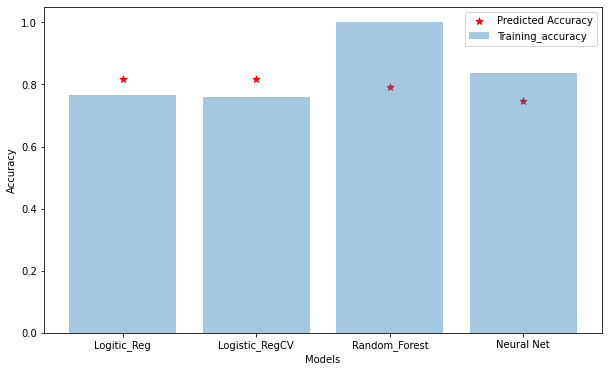

In [128]:
plt.figure(figsize=(10,6))
plt.bar(df_com['Models'],df_com['training_Score'],alpha=.4,label='Training_accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.scatter(df_com['Models'],df_com['Accuracy'],color='r',marker='*',s=50,label='Predicted Accuracy')
plt.legend()

# **Conclusion**

**1.**Its is clearly seen that random forest is overfitting the data, but this could be improved by tunning some parameters of it. Since the problem set is too small for such modifications, we will keep the above as same.



**2.**Small data set is when fed to Neural network it performed well but performance of Logistic regression could be seen doing better than all.

**3.**Therefore we will consider Logistic regression suitable for the problem set.
There are more classification algorithms such KNN,Support vectors machine etc which could also be used.


